Importing libraries

In [ ]:
import numpy as np   # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
# import matplotlib and seaborn
# for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# This line ensures that the plot is displayed
# inside the notebook
%matplotlib inline



Reading the dataset


In [ ]:
data=pd.read_csv('winequality-white.csv',sep=';')

Attribute of dataset

In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Information about different attributes in dataset


In [ ]:
data.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.0              0.27         0.36  ...       0.45      8.8        6
1               6.3              0.30         0.34  ...       0.49      9.5        6
2               8.1              0.28         0.40  ...       0.44     10.1        6
3               7.2              0.23         0.32  ...       0.40      9.9        6
4               7.2              0.23         0.32  ...       0.40      9.9        6
...             ...               ...          ...  ...        ...      ...      ...
4893            6.2              0.21         0.29  ...       0.50     11.2        6
4894            6.6              0.32         0.36  ...       0.46      9.6        5
4895            6.5              0.24         0.19  ...       0.46      9.4        6
4896            5.5              0.29         0.30  ...       0.38     12.8        7
4897            6.0              

Size of dataset 

In [ ]:
data.shape

(4898, 12)

Chcking for missing values in dataset

In [ ]:
print(data.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Datatypes of different attribute

In [ ]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Plotting graph between quality and  thier count. 

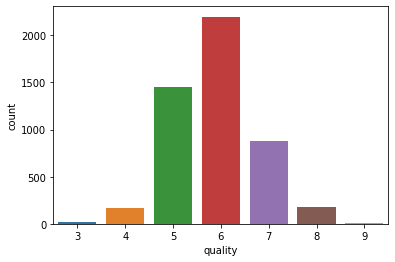

In [ ]:
#count of the quality variable
sns.countplot(x='quality', data=data)


In it we have output about the count ,mean,standard deviation and many other thing of the differnt attribute in a dataset.

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


*Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.*

In [ ]:
correlations = data.corr()
print(correlations)

                      fixed acidity  volatile acidity  ...   alcohol   quality
fixed acidity              1.000000         -0.022697  ... -0.120881 -0.113663
volatile acidity          -0.022697          1.000000  ...  0.067718 -0.194723
citric acid                0.289181         -0.149472  ... -0.075729 -0.009209
residual sugar             0.089021          0.064286  ... -0.450631 -0.097577
chlorides                  0.023086          0.070512  ... -0.360189 -0.209934
free sulfur dioxide       -0.049396         -0.097012  ... -0.250104  0.008158
total sulfur dioxide       0.091070          0.089261  ... -0.448892 -0.174737
density                    0.265331          0.027114  ... -0.780138 -0.307123
pH                        -0.425858         -0.031915  ...  0.121432  0.099427
sulphates                 -0.017143         -0.035728  ... -0.017433  0.053678
alcohol                   -0.120881          0.067718  ...  1.000000  0.435575
quality                   -0.113663         -0.19472

Co-relation plot for seeing how much data corelated to predicting label

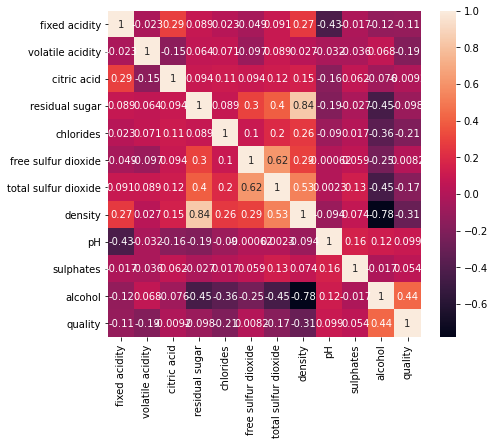

In [ ]:
corelation=data.corr()
plt.figure(figsize=(7,6))
sns.heatmap(corelation,annot=True)

In [ ]:
#next we shall add a new column called Review. This column will contain the values of 1,2, and 3,4. 
#1 - Poor
#2 - Average
#3 - Good
#4 - Excellent
#This will be split in the following way. 
#1,2,3 --> Poor
#4,5 --> Average
#6,7 --> Good
#8,9,10->Excellent
#Create an empty list called Reviews.

reviews = []
for i in data['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 5:
        reviews.append('2')
    elif i >= 6 and i <= 7:
        reviews.append('3')
    elif i >= 8 and i <= 10:
        reviews.append('4')
data['Reviews'] = reviews

In [ ]:
#view newly added column
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Reviews'],
      dtype='object')

After add new column following are the datatypes of each attribute

In [ ]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Reviews                  object
dtype: object

In [ ]:
data['Reviews'].unique()

array(['3', '2', '4', '1'], dtype=object)

Count the records which are present in differnt differnt review value

In [ ]:
Counter(data['Reviews'])

Counter({'1': 20, '2': 1620, '3': 3078, '4': 180})

In [ ]:
data.shape

(4898, 13)

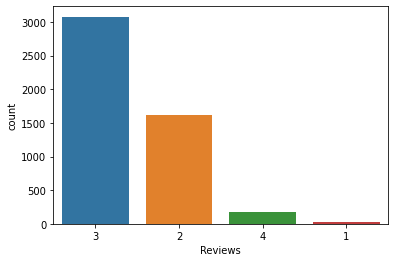

In [ ]:
#count of the target variable
sns.countplot(x='Reviews', data=data)

Splitting the attributes in dependent variable and non-dependent variable.

In [ ]:
x = data.iloc[:,:11]
y = data['Reviews']

In [ ]:
print(y)

0       3
1       3
2       3
3       3
4       3
       ..
4893    3
4894    2
4895    3
4896    3
4897    3
Name: Reviews, Length: 4898, dtype: object


In [ ]:
print(x)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.0              0.27         0.36  ...  3.00       0.45      8.8
1               6.3              0.30         0.34  ...  3.30       0.49      9.5
2               8.1              0.28         0.40  ...  3.26       0.44     10.1
3               7.2              0.23         0.32  ...  3.19       0.40      9.9
4               7.2              0.23         0.32  ...  3.19       0.40      9.9
...             ...               ...          ...  ...   ...        ...      ...
4893            6.2              0.21         0.29  ...  3.27       0.50     11.2
4894            6.6              0.32         0.36  ...  3.15       0.46      9.6
4895            6.5              0.24         0.19  ...  2.99       0.46      9.4
4896            5.5              0.29         0.30  ...  3.34       0.38     12.8
4897            6.0              0.21         0.38  ...  3.26       0.32     11.8

[4898 rows x 11

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


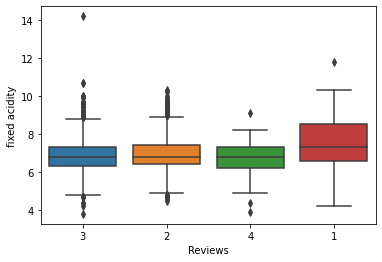

In [ ]:
#Plot a boxplot to check for Outliers
#Target variable is Reviews. So will plot a boxplot each column against target variable
sns.boxplot('Reviews', 'fixed acidity', data = data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


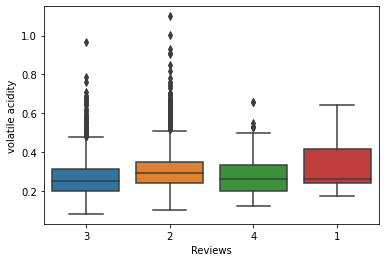

In [ ]:
sns.boxplot('Reviews', 'volatile acidity', data = data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


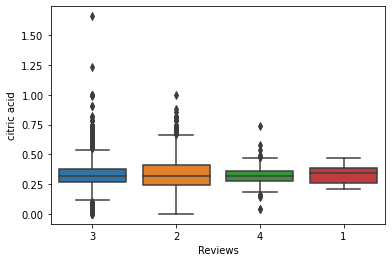

In [ ]:
sns.boxplot('Reviews', 'citric acid', data = data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


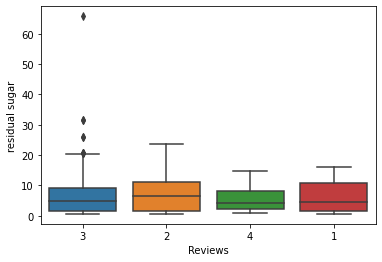

In [ ]:
sns.boxplot('Reviews', 'residual sugar', data = data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


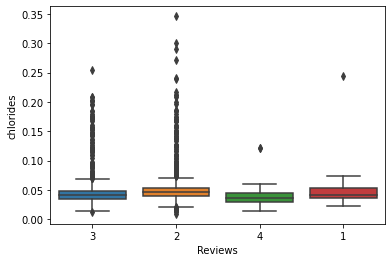

In [ ]:
sns.boxplot('Reviews', 'chlorides', data = data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


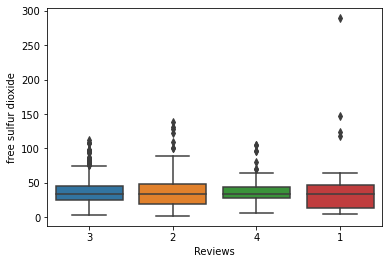

In [ ]:
sns.boxplot('Reviews', 'free sulfur dioxide', data = data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


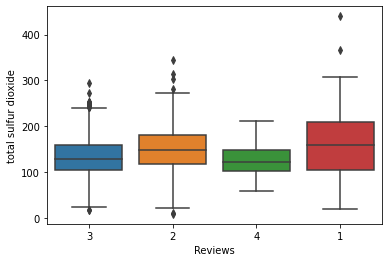

In [ ]:
sns.boxplot('Reviews', 'total sulfur dioxide', data = data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


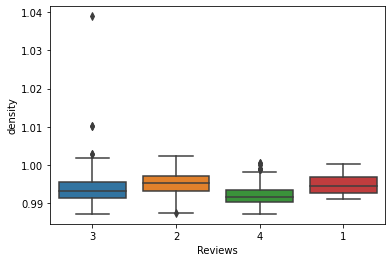

In [ ]:
sns.boxplot('Reviews', 'density', data = data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


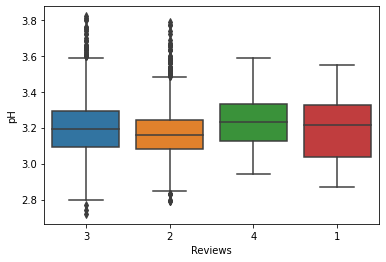

In [ ]:
sns.boxplot('Reviews', 'pH', data = data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


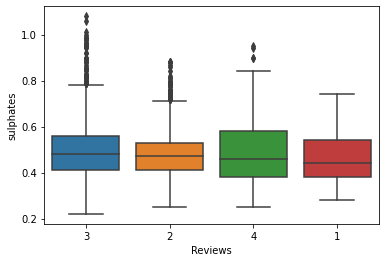

In [ ]:
sns.boxplot('Reviews', 'sulphates', data = data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


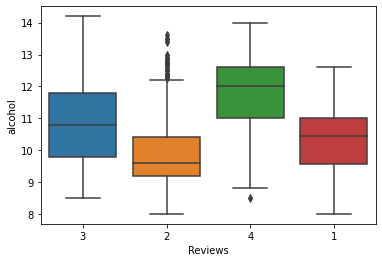

In [ ]:
sns.boxplot('Reviews', 'alcohol', data = data)

we have divide our dataset like 20 percent for test data and 80 percent for the training data. 

In [ ]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)
 
 



In [ ]:
print(y_train)

4595    3
1808    2
1188    3
1388    3
1836    3
       ..
321     2
4066    3
3980    2
931     2
1984    4
Name: Reviews, Length: 3918, dtype: object


In [ ]:
y_train.head(5)

4595    3
1808    2
1188    3
1388    3
1836    3
Name: Reviews, dtype: object

In the cell we have to fit our x_train and y_train for using in futher algorithm.

In [ ]:
#feature scaling
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
print(x_train)

[[ 0.27991559  1.0942557  -0.28035304 ... -0.77585151 -0.60060471
   0.31558978]
 [ 0.74952296  0.5078455   0.45165799 ... -0.18435112 -0.86337206
  -0.90697548]
 [ 0.27991559 -0.66497489 -0.28035304 ... -0.38151792 -1.38890677
  -0.49945372]
 ...
 [-0.89410281 -0.56723986 -0.68702583 ...  0.14426021 -0.77578295
   0.15258108]
 [-0.54189729 -0.17629973  0.77699622 ... -0.71012925 -0.95096118
  -1.31449723]
 [ 0.8669248  -0.76270993 -0.28035304 ... -0.31579565 -0.25024824
  -1.31449723]]


In [ ]:
print(x_test)

[[-0.65929913 -1.05591503 -0.11768392 ...  0.341427   -0.51301559
   0.64160719]
 [-0.07228993  3.53763152 -2.06971333 ...  1.19581646 -0.25024824
  -1.31449723]
 [ 0.98432664 -0.56723986  0.69566166 ...  0.7357606   0.01251912
   1.04912894]
 ...
 [-0.18969177 -0.95817999 -0.19901848 ... -0.71012925  0.01251912
  -0.58095807]
 [-1.24630834 -1.44685516 -0.93102951 ...  0.86720513 -0.60060471
   0.96762459]
 [ 0.16251375 -0.66497489  0.04498519 ... -1.30162964  0.8884103
  -0.90697548]]


* We have to use differnt types of model to find the most accurate algolithm which we applied on our dataset*
# 1. Logistic Regression

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


                              
Confusion Matrix
[[  0   1   2   0]
 [  0 160 170   0]
 [  0  69 545   0]
 [  0   0  33   0]]
                              
Accuracy Score : 71.93877551020408 %
                              
Confusion matrix plot


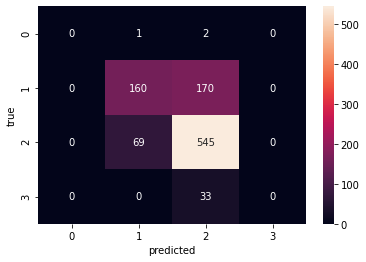

                              
Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.70      0.48      0.57       330
           3       0.73      0.89      0.80       614
           4       0.00      0.00      0.00        33

    accuracy                           0.72       980
   macro avg       0.36      0.34      0.34       980
weighted avg       0.69      0.72      0.69       980



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#print confusion matrix and accuracy score
print(" "*30)
print("Confusion Matrix")
print(cm)

print(" "*30)
print('Accuracy Score :',accuracy_score(y_test, y_pred) * 100 ,"%")
print(" "*30)
print('Confusion matrix plot')
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt="d")
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print(" "*30)
print("Classification Report")
print(classification_report(y_test,y_pred))

In above algorithm we find 71.93% accuracy. then we apply next algorithm

**The intercept (often labeled the constant) is the expected mean value of Y when all Xi=0.**

In [ ]:
classifier.intercept_

array([-3.10941133,  1.53966999,  2.43295419, -0.86321285])

The assumption of error terms being normally distributed holds good

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Actual vs Predictions')

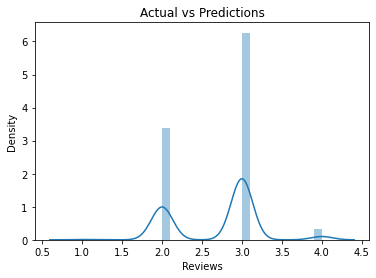

In [ ]:
#Making Predictions
pred = classifier.predict(x_test)
sns.distplot((y_test),bins=30)
plt.title('Actual vs Predictions')

In [ ]:
df= pd.DataFrame({'Actual':y_test,'Predictions':pred})

df.head()

,Actual,Predictions
3114,3,3
230,2,2
547,3,3
4555,2,2
388,3,3



# 2. Decision Trees 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)

Confusion Matrix
[[  0   2   1   0]
 [  0 231  93   6]
 [  1  96 501  16]
 [  0   1  16  16]]
                              
******************************
Decision Tree Classifier accuracy is :76.32653061224491
                              
Confusion matrix plot


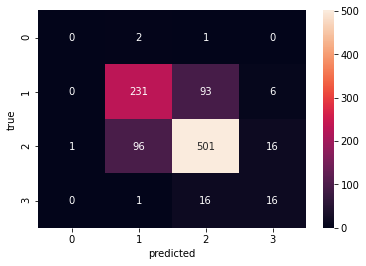

                              
Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.70      0.70      0.70       330
           3       0.82      0.82      0.82       614
           4       0.42      0.48      0.45        33

    accuracy                           0.76       980
   macro avg       0.49      0.50      0.49       980
weighted avg       0.76      0.76      0.76       980



In [ ]:
#print confusion matrix and accuracy score
print('Confusion Matrix')
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
#print(dt_acc_score*100)
print(" "*30)
print("*"* 30)
#score=accuracy_score(y_test,pred)
print("Decision Tree Classifier accuracy is :{}".format(dt_acc_score*100))
print(" "*30)
print('Confusion matrix plot')
sns.heatmap(confusion_matrix(y_test, dt_predict),annot=True,fmt="d")
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print(" "*30)
print("Classification Report")
print(classification_report(y_test,dt_predict))

In above algorithm we got 76.32 %  accuracy which is better than linear regression then we check another one more algorithm.



**Overfitting**

To explain overfitting, I think it’s best if we look at a dataset. There is a white winequality dataset which is quite famous. This dataset has 11 different attributes that decide the reviews of white wine. These attributes include:

    fixed acidity
    volatile acidity
    citric acid
    residual sugar
    chlorides
    free sulfur dioxide
    total sulfur dioxide
    density
    pH
    sulphates
    alcohol

Based on these different attributes, we are required to predict the reviews on white wine which are varying from 1-4.



we calculate accuracies for different values of max_depth and make a plot

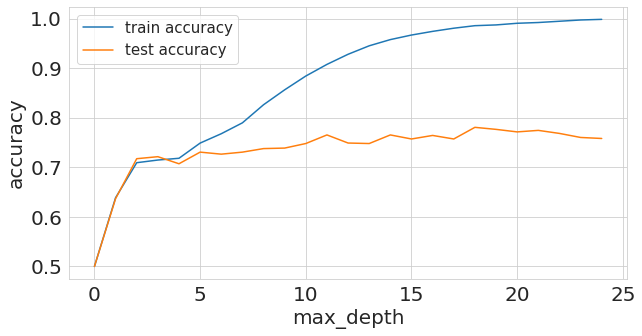

In [ ]:
# import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics

# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]
# iterate over a few depth values
for depth in range(1, 25):
 # init the model
 dtc = tree.DecisionTreeClassifier(max_depth=depth)
 # columns/features for training
 
 
 # fit the model on given features
 dtc.fit(x_train,y_train)
 # create training & test predictions
 train_predictions = dtc.predict(x_train)
 test_predictions = dtc.predict(x_test)
 # calculate training & test accuracies
 train_accuracy = metrics.accuracy_score(
 y_train, train_predictions
 )
 test_accuracy = metrics.accuracy_score(
 y_test, test_predictions
 )

 # append accuracies
 train_accuracies.append(train_accuracy)
 test_accuracies.append(test_accuracy)
# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()



We see that the best score for test data is obtained when max_depth has a value of 20. As we keep increasing the value of this parameter, test accuracy remains the same or gets worse, but the training accuracy keeps increasing. It means that our simple decision tree model keeps learning about the training data better and better with an increase in max_depth, but the performance on test data does not improve at all.

This is called overfitting.



# 3. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_predict=nb.predict(x_test)

Confusion Matrix
[[  0   1   2   0]
 [ 10 173 147   0]
 [  4 137 466   7]
 [  0   2  28   3]]
******************************
Naive Bayes Classifier accuracy is :65.51020408163265
                              
Confusion matrix plot


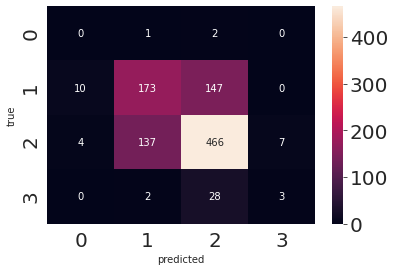

                              
Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.55      0.52      0.54       330
           3       0.72      0.76      0.74       614
           4       0.30      0.09      0.14        33

    accuracy                           0.66       980
   macro avg       0.39      0.34      0.35       980
weighted avg       0.65      0.66      0.65       980



In [ ]:
#print confusion matrix and accuracy score
print('Confusion Matrix')
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print(nb_conf_matrix)

print("*"* 30)
#score=accuracy_score(y_test,pred)
print("Naive Bayes Classifier accuracy is :{}".format(nb_acc_score*100))
#print(nb_acc_score*100)
print(" "*30)
print('Confusion matrix plot')
sns.heatmap(confusion_matrix(y_test, nb_predict),annot=True,fmt="d")
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print(" "*30)
print("Classification Report")
print(classification_report(y_test,nb_predict))

In it we find the lowest accuracy above all the three algorithm which is 65.51 %.

# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
pred=KNN.predict(x_test)

******************************
KNeighborsClassifier accuracy is :73.87755102040816
                              
Confusion matrix
[[  0   1   2   0]
 [  0 205 124   1]
 [  0  95 515   4]
 [  0   1  28   4]]
                              
Confusion matrix plot


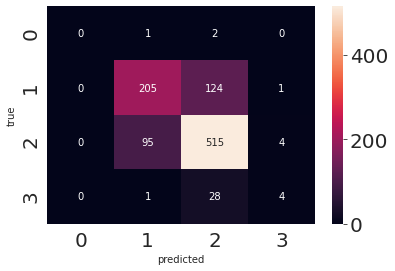

                              
Classification Report
                              
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.68      0.62      0.65       330
           3       0.77      0.84      0.80       614
           4       0.44      0.12      0.19        33

    accuracy                           0.74       980
   macro avg       0.47      0.40      0.41       980
weighted avg       0.73      0.74      0.73       980



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
knn_conf_matrix = confusion_matrix(y_test, pred)

print("*"* 30)
score=accuracy_score(y_test,pred)
print("KNeighborsClassifier accuracy is :{}".format(score*100))
print(" "*30)
print('Confusion matrix')
print(knn_conf_matrix)
print(" "*30)
print('Confusion matrix plot')
sns.heatmap(confusion_matrix(y_test, pred),annot=True,fmt="d")
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print(" "*30)
print("Classification Report")
print(" "*30)
print(classification_report(y_test,pred))

From these algo we get accuracy of 73.87% which is compartively only less than decission tree algorithm.

# In above dataset we find that decision tree algorithm gets max accuracy which is 77.04 % .

# Random forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

******************************
RandomForestClassifier accuracy is :82.14285714285714
                              
Confusion matrix
[[  0   1   2   0]
 [  0 234  96   0]
 [  0  55 559   0]
 [  0   0  21  12]]
                              
Confusion matrix plot


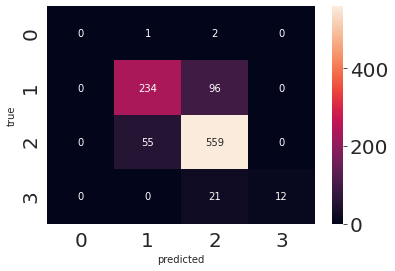

                              
Classification Report
                              
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.81      0.71      0.75       330
           3       0.82      0.91      0.87       614
           4       1.00      0.36      0.53        33

    accuracy                           0.82       980
   macro avg       0.66      0.50      0.54       980
weighted avg       0.82      0.82      0.81       980



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pred = rfc.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, pred)

print("*"* 30)
score=accuracy_score(y_test,pred)
print("RandomForestClassifier accuracy is :{}".format(score*100))
print(" "*30)
print('Confusion matrix')
print(rf_conf_matrix)
print(" "*30)
print('Confusion matrix plot')
sns.heatmap(confusion_matrix(y_test, pred),annot=True,fmt="d")
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print(" "*30)
print("Classification Report")
print(" "*30)
print(classification_report(y_test,pred))

# We got maximum accuracy in this model among all the models we applied earlier.